<a href="https://colab.research.google.com/github/MadhuriKonnur/AVLoanDelinquency/blob/master/MK_CC_Approval_GG_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** *Credit card approval  prediction**

using different ML algorithms and most influencing features on approval of creditcards
Some other parameter correction.
*

by Madhuri Konnur

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Data  dependencies

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

###


from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score,precision_recall_curve

access data from google  drive , for  example  from  drive  go to sharable  links  of  ( .csv files ) .
Take  test  and  train  data  csv files  shareable  links.
paste  it  and  take  out  id's 

train - https://drive.google.com/open?id=1leP7I4VCJw4huILoIIqf_hJkz_Un2izO
test- https://drive.google.com/open?id=11gV9P9VvhI1hBIwbNptJvuCDHi9J2sX0

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Google drive  data access
train_downloaded=drive.CreateFile({'id':'1leP7I4VCJw4huILoIIqf_hJkz_Un2izO'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'11gV9P9VvhI1hBIwbNptJvuCDHi9J2sX0'})
test_downloaded.GetContentFile('test.csv')


In [0]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [51]:
data.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [52]:
# check out the size of the data
print("Train data shape:", data.shape)
print("Test data shape:", test.shape)

Train data shape: (590, 17)
Test data shape: (100, 16)


**Analysing Target**

In [53]:

# Here our target column is 'Approved'
vc = data['Approved'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Approved"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Approved" : "Count"})
vc

,Target,Count,percent
0,-,358,60.68
1,+,232,39.32


-    358
+    232
Name: Approved, dtype: int64

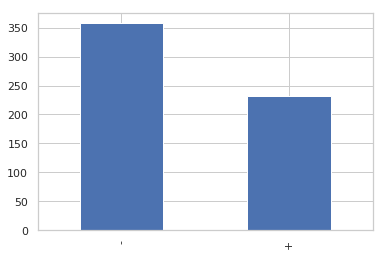

In [54]:
data['Approved'].value_counts().plot('bar')
data['Approved'].value_counts()

Here 358 -> Not approved(-)
 and 232 -> approved(+)

 **Missing values Check**

In [55]:

# Inspect missing values in the dataset
print(data.isnull().values.sum())






    

0


Here data  showes 0 missing values. On observing dataset many fields are  represented  in '?'. Let's  treat  these  hidden data by replacing  Nan values

In [56]:
# Replace the '?'s with NaN
df = data.replace("?",np.NaN)

# Inspect the missing values again
# ... YOUR CODE FOR TASK 3 ...
df.head()


#data.count(axis=0)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,NaN,26.5,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80,0,-


In [57]:
# Now find the count of non-NA value across the row axis ( Here  total  count  is  590)
df.count(axis=0)

Key               590
Male              579
Age               578
Debt              590
Married           584
BankCustomer      584
EducationLevel    581
Ethnicity         581
YearsEmployed     590
PriorDefault      590
Employed          590
CreditScore       590
DriversLicense    590
Citizen           590
ZipCode           577
Income            590
Approved          590
dtype: int64

From above non-NA  value  count ,we  can make out 
Male,
Age,
Married,
BankCustomer,
EducationLevel,
Ethnicity
and
ZipCode

are  having  missing  values


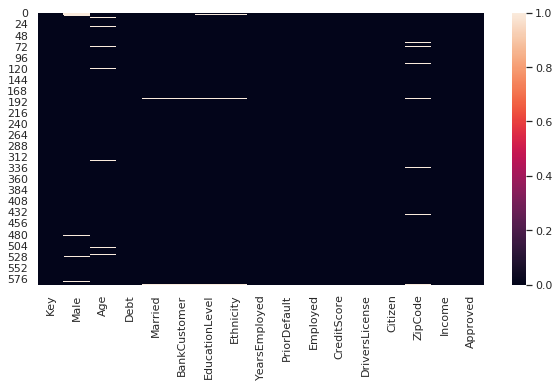

In [58]:

#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull())
#df.isnull().sum()
#(approx 60+ values are missing)

In [59]:
# to fill  missing  values ,checking  for  data types 
df.dtypes

Key                 int64
Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

The dataset consists of 16 anonymized variables(both numeric and categorical),'Key', 'Male', 'Age', 'Married',
       'BankCustomer', 'EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ZipCode','Approved' etc
and 1 target variable - Approved. 

Total 17 variables
       
       Let's look at the distribution of target.
       
       (Here  **'+'** are ***Approved***  and  '-' are  not approved)

**Handling missing values**

None of the  numeric data contains missing values.
Let's look into categorical data

In [0]:
# Here  it is  good  idea fill 0 value  for  missing data for ZipCode, instead of most frequently occurring 
   df['ZipCode'] = df['ZipCode'].fillna(0)
  

In [0]:
#imputing remaing(object type) missing values with the most frequent values for respective columns .
#(This is good practice when it comes to imputing missing values for categorical data in general)

col_o = ('Male', 'Age', 'Married',
       'BankCustomer', 'EducationLevel','Ethnicity')

for c1 in col_o:
    #lbl = LabelEncoder() 
    #lbl.fit(list(data[c].values)) 
    #data[c] = lbl.transform(list(data[c].values))
    df[c1] = df[c1].fillna(df[c1].value_counts().index[0])






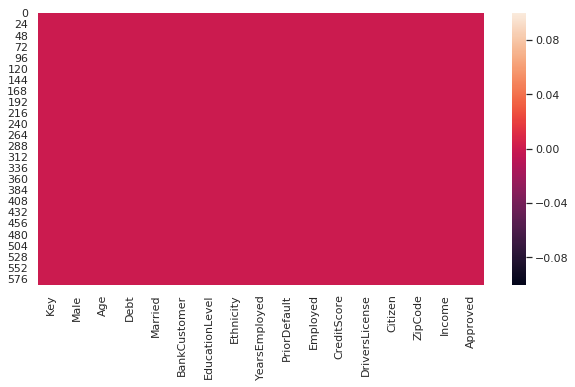

In [62]:
# Now let's visualize data  once more for missing  value
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull())

Now no  more missing values

**PreProcessing Data**


For further ease of analysis,**Encoding string to intiger ( Categoriacal object to intiger)**

In [0]:
# Categorical Data with Object type

cols = ('Male', 'Age', 'Married',
       'BankCustomer', 'EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ZipCode')
# removing 'Approved ' for test  data


Before training, let's **standardize data by perform min max scaling**.

In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [0]:
#for Approved seperately

lbl.fit(list(df['Approved'].values))
df['Approved']=lbl.transform(list(df['Approved'].values))




After  transfer Approved  + becomes  0.
And not apprived  - becomes 1

**Finding the corelation between attributes**

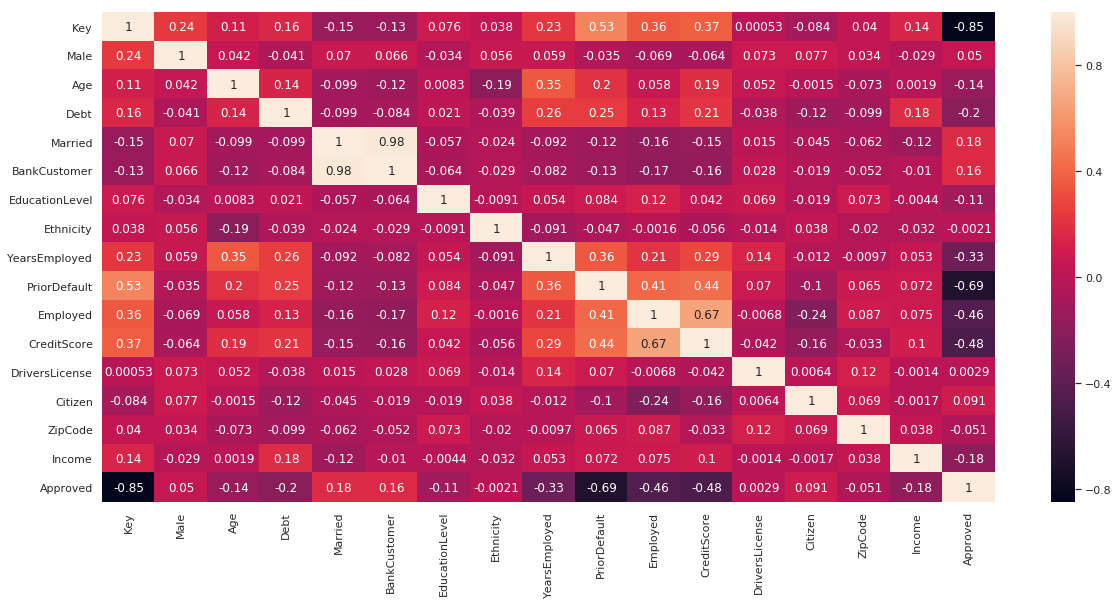

In [66]:
df_corr = df.select_dtypes(include=[np.number])

#Coralation plot
corr = df_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

Approval of  credit card is negatively correlated with 'YearsEmployed','PriorDefault','Employed','CreditScore','Age' and 'Debt'
(As 'Key' is  only for  representation just ignoring it)

In [0]:
 f1=('YearsEmployed','PriorDefault','Employed','CreditScore','Age' , 'Debt')

#X = df.drop(["Approved"], axis=1)
X=df[['YearsEmployed','PriorDefault','Employed','CreditScore','Age' , 'Debt']]
y=df['Approved'].values


X = preprocessing.MinMaxScaler().fit_transform(X.values)



In [0]:
# Considering f1  features 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2 , random_state=40, stratify=y)

#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [0]:
def CMatrix(CM,labels=['app','ntapp']):
    df=pd.DataFrame(data=CM,index=labels,columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total']= df.sum()
    df['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df                
   
                  
                  
  

In [0]:
#Preparing  a dataframe for  modelling

#Data frame  for  evaluation matrix
metrics=pd.DataFrame(index=['accuracy','precision','recall','f1-score'],columns=['LogisticReg','ClassTree','NaiveBayes'])

A.Logistic Regression

In [71]:
logistic_reg=LogisticRegression(n_jobs=-1,random_state=15)



logistic_reg.fit(X_train, y_train)

y_pred_test = logistic_reg.predict(X_test)
    




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [72]:
metrics.loc['accuracy','LogisticReg']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','LogisticReg']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','LogisticReg']=recall_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['f1_score','LogisticReg']=f1_score(y_pred=y_pred_test,y_true=y_test)

#Confusion Matrix
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)

CMatrix(CM)


PREDICTION,app,ntapp,Total
TRUE,,,
app,46,0,170.0
ntapp,16,56,184.0
Total,62,56,118.0


B.Classification Tree

In [0]:
#1.Import  estimator  object (Model)
from sklearn.tree import DecisionTreeClassifier

#2. create an instance  of  estimator(model)
class_tree=DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=10)

#3.Using  training  data to  train the  model

class_tree.fit(X_train,y_train)
y_pred_test=class_tree.predict(X_test)


In [74]:
metrics.loc['accuracy','ClassTree']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','ClassTree']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','ClassTree']=recall_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['f1_score','ClassTree']=f1_score(y_pred=y_pred_test,y_true=y_test)


#Confusion Matrix
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)

CMatrix(CM)

PREDICTION,app,ntapp,Total
TRUE,,,
app,37,9,138.0
ntapp,9,63,216.0
Total,46,72,118.0


**C.Naive Bayes Classifier**

In [0]:
#1. Import the  estimator  object(Model)
from sklearn.naive_bayes import GaussianNB
#2. Create a instance of  model
NBC=GaussianNB()    # for NB tuning is  not  required
# Use the  training data  to  train the  estimator(model)
NBC.fit (X_train, y_train)

# Evaluate  model
y_pred_test=NBC.predict(X_test)



In [76]:
metrics.loc['accuracy','NaiveBayes']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NaiveBayes']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NaiveBayes']=recall_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['f1_score','NaiveBayes']=f1_score(y_pred=y_pred_test,y_true=y_test)


#Confusion Matrix
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)

CMatrix(CM)

PREDICTION,app,ntapp,Total
TRUE,,,
app,36,10,130.0
ntapp,6,66,224.0
Total,42,76,118.0


Let's  compare  all 3 models 

In [77]:
100*metrics

,LogisticReg,ClassTree,NaiveBayes
accuracy,86.4407,84.7458,86.4407
precision,100,87.5,86.8421
recall,77.7778,87.5,91.6667
f1-score,NaN,NaN,NaN
f1_score,87.5,87.5,89.1892


Here Classification Tree model  dramatically  looks  good .
Even precision (100) and  recall(77.77) rate  at  logistic regression looks good.
Let's visualize these metrics

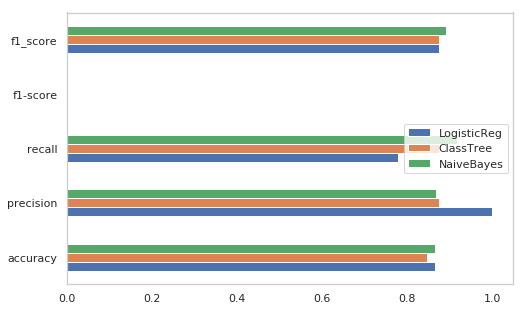

In [78]:
fig,ax=plt.subplots(figsize=(8,5))
metrics.plot(kind='barh',ax=ax)
ax.grid();

Let's look at  precision   and  recall fro  logistic &NB models

Precision and accuracy  is  good  in logistic 
Recall is  good  in Naïve 
 This  is  not full stoty  . Since  we  are  looking  at  good  recall ,  it  can be  always   adjusted with  Threshold 

Let’s take  a look at  precision,accuracy  and  recall  relation using  precision curve  for  Naïve & Logist regression


In [0]:
precision_NB,recall_NB,thresholds_NB=precision_recall_curve(y_true=y_test,probas_pred=NBC.predict_proba(X_test)[:,1])
precision_LR,recall_LR,thresholds_LR=precision_recall_curve(y_true=y_test,probas_pred=logistic_reg.predict_proba(X_test)[:,1])

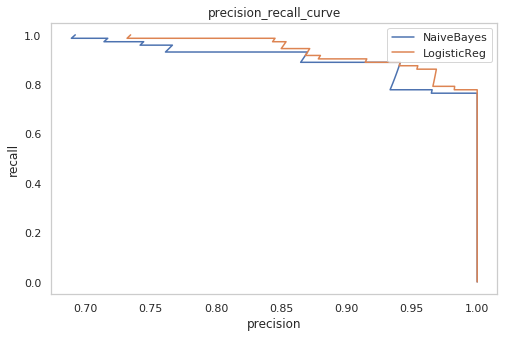

In [80]:
#Let's visualize precision recall curve 
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(precision_NB,recall_NB,label='NaiveBayes')
ax.plot(precision_LR,recall_LR,label='LogisticReg')
ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.set_title('precision_recall_curve')
#ax.hlines(y=0.7,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid();

Here  logistic  regression looks  better , Example  for  give  point  recall  gives better precision ( say for  recall =0.75  we  get  better  precision for logistic regression) Let's check again  with this recall

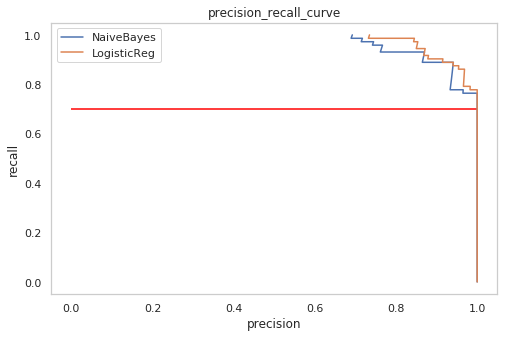

In [81]:
#Let's visualize precision recall curve 
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(precision_NB,recall_NB,label='NaiveBayes')
ax.plot(precision_LR,recall_LR,label='LogisticReg')
ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.set_title('precision_recall_curve')
ax.hlines(y=0.7,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid();

Now will try to make logistic regression recall rate  as  better as NaiveBayes model

Visualizing precision recall  for Logistic Reg, By  checking threshold

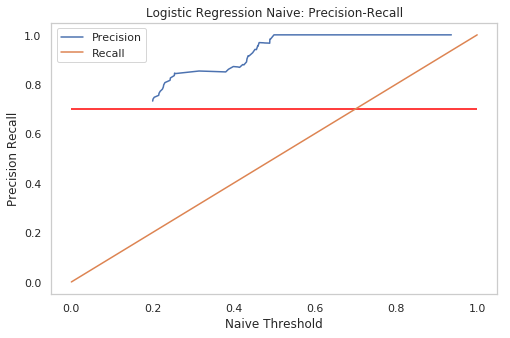

In [82]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(thresholds_LR,precision_LR[1:],label='Precision')
ax.plot(recall_LR,recall_LR[:],label='Recall')
ax.set_xlabel('Naive Threshold')
ax.set_ylabel('Precision Recall')
ax.set_title('Logistic Regression Naive: Precision-Recall')
ax.hlines(y=0.7,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid();


In this  plot we can see on x -axis   Nive Threshold  at 0.45 gives  better recall about  0.85 and  precision about 0.92 like that 
(By  default  Threshold  set  to  0.5) 
Adusting classification threshold  to  0.45 for  logistic  regression


In [83]:
#Classifier with threshold 0.45
y_pred_proba=logistic_reg.predict_proba(X_test)[:,1]
y_pred_test=(y_pred_proba >=0.45).astype('int')
             
#Confusion Matrix
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)

print("Accuracy:",100*accuracy_score(y_pred=y_pred_test,y_true=y_test))
print("Recall:",100*recall_score(y_pred=y_pred_test,y_true=y_test)) 
print("Precision:",100*precision_score(y_pred=y_pred_test,y_true=y_test)) 
print("F1:",100*f1_score(y_pred=y_pred_test,y_true=y_test)) 
CMatrix(CM)             

Accuracy: 88.98305084745762
Recall: 88.88888888888889
Precision: 92.7536231884058
F1: 90.78014184397163


PREDICTION,app,ntapp,Total
TRUE,,,
app,41,5,144.0
ntapp,8,64,210.0
Total,49,69,118.0


***Making use of threshold value predicting given "test" value using LogisticRegression***

In [0]:
# let's scale  test  value 

# here  also all catagorial vaar to  int
# c is  already defined during train data
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))
    
    
    
    test1=test[['YearsEmployed','PriorDefault','Employed','CreditScore','Age' , 'Debt']]
    
#Standardising  values  like train data

scaler = preprocessing.MinMaxScaler()
scaler.fit(test1.values)
test_x_scale = scaler.transform(test1.values)

In [85]:
test_pred_proba=logistic_reg.predict_proba(test_x_scale)[:,1]
Y=(test_pred_proba >=0.45).astype('int')
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
# preparing Submission file

temp = pd.DataFrame([])
temp['Key']= test['Key']

temp['Approved'] = [int(x) for x in Y]
temp['Approved'].replace([0,1],['+','-'],inplace=True)
temp.to_csv("submission.csv", index = False)
sub= pd.read_csv("submission.csv")
sub.head()


,Key,Approved
0,1,-
1,2,-
2,3,-
3,4,-
4,5,-


In [0]:
# downloading  the submission file directly  (without  google  drive )

#from google.colab import files
#files.download('submission.csv')